In [1]:
import pandas as pd 
import universal_stat_tests
import matplotlib.pyplot as plt
import numpy as np

### Cummulitive Sums function

In [2]:
def cumsum(real, fake, cols=None):
    if cols is None:
        cols = list(real.columns)
        print(cols)
    else:
        cols = cols


    for col in cols:
        #print(real[col].dtypes)
        #if not (real[col].dtypes == np.int64 or real[col].dtypes == np.float16):
        #    print(f'The type of {col} isn\'t int or float')
        #    continue

        # calculating cummulative sums
        real_ = real[col].sort_values()
        real_.reset_index(drop=True, inplace=True)
        real_cummsum = real_.cumsum()

        fake_ = fake[col].sort_values()
        fake_.reset_index(drop=True, inplace=True)
        fake_cummsum = fake_.cumsum()
        fake_cummsum = fake_cummsum[:len(real_cummsum)]

        # plotting

        x1 = [i for i in range(len(real_cummsum))]
        x2 = [i for i in range(len(fake_cummsum))]

        plt.figure(figsize=(6, 6))
        plt.title(col)
        plt.scatter(x1, real_cummsum, alpha=0.5)
        plt.scatter(x2, fake_cummsum, alpha=0.5)
        plt.legend(labels=[f'Real {col}', f'Fake {col}'])
        plt.show()


### Tests

In [3]:
real = pd.read_csv('datasets/real_data.csv')
ctgan_data = pd.read_csv('synCleanData/synCleanData_ctgan.csv')

In [4]:
print(real.columns)

Index(['Unnamed: 0', 'Age', 'Number of sexual partners',
       'First sexual intercourse', 'Num of pregnancies', 'Smokes',
       'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [5]:
real.columns

Index(['Unnamed: 0', 'Age', 'Number of sexual partners',
       'First sexual intercourse', 'Num of pregnancies', 'Smokes',
       'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [6]:
ks_tests = universal_stat_tests.ks_test(real, ctgan_data)
t_tests = universal_stat_tests.t_test(real, ctgan_data)

In [7]:
accepts_ks_test = 0 
rejects_ks_test = 0

accepts_t_test = 0 
rejects_t_test = 0

for row in ks_tests:
    col = row[0]
    stat = row[1]
    p = row[2]
    if stat > p: 
        rejects_ks_test += 1
        #print(f'Reject {col} by ks-test') 
    else: 
        accepts_ks_test += 1
        #print(f'Accept {col} by ks-test') 

for row in t_tests:
    col = row[0]
    stat = row[1]
    p = row[2]
    if stat > p: 
        accepts_t_test += 1
        #print(f'Reject {col} by ks-test') 
    else: 
        rejects_t_test += 1
        #print(f'Accept {col} by ks-test') 

In [8]:
print(f'Accepted {accepts_ks_test}/{accepts_ks_test+rejects_ks_test} columns by ks-test')
print(f'Accepted {accepts_t_test}/{accepts_t_test+rejects_t_test} columns by ks-test')

Accepted 25/35 columns by ks-test
Accepted 7/35 columns by ks-test


['Unnamed: 0', 'Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


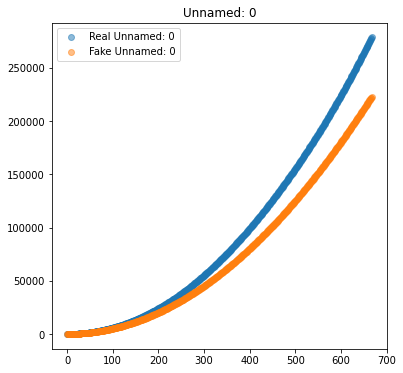

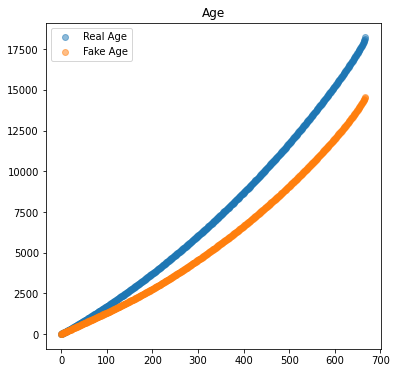

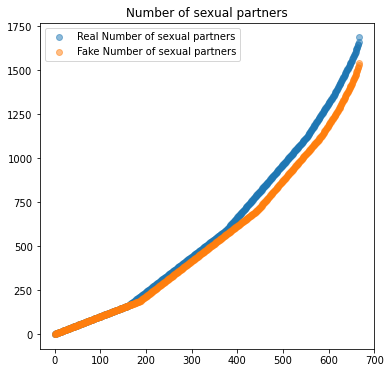

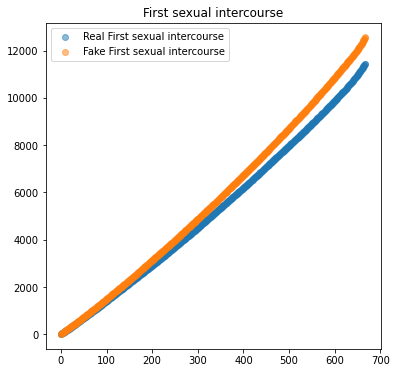

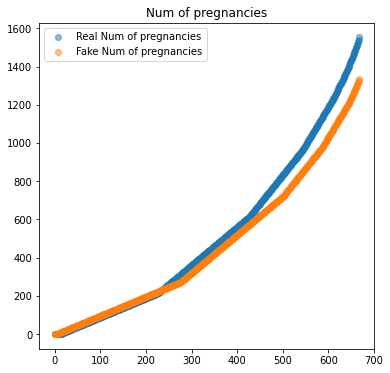

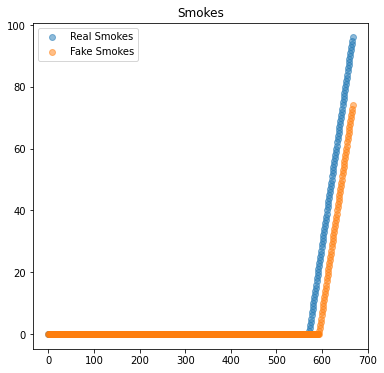

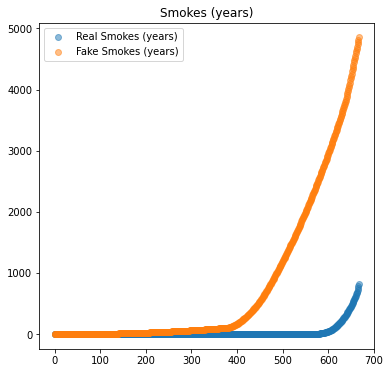

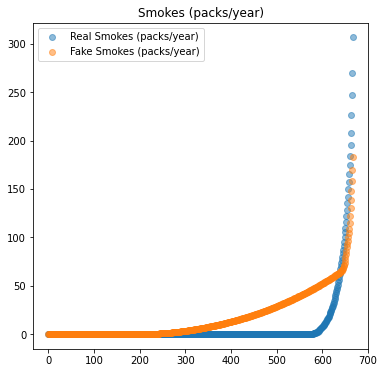

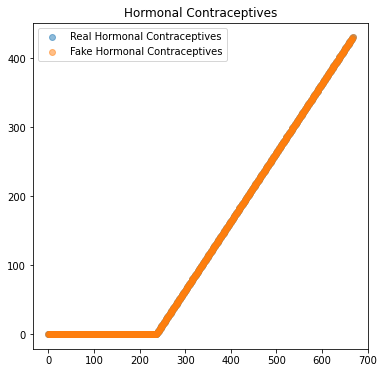

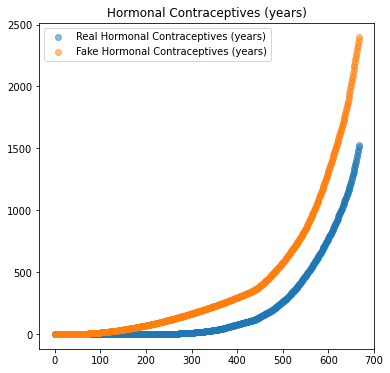

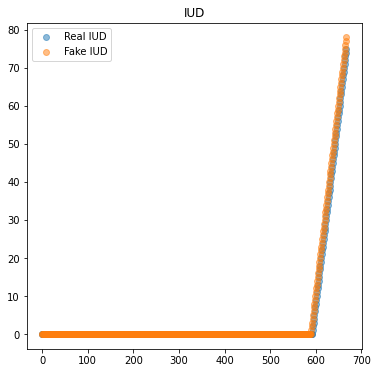

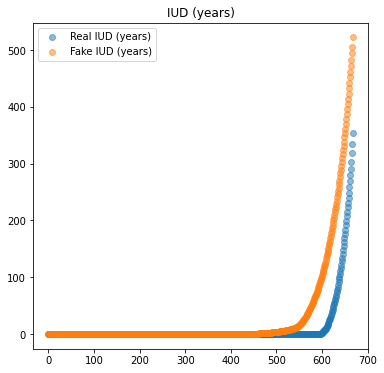

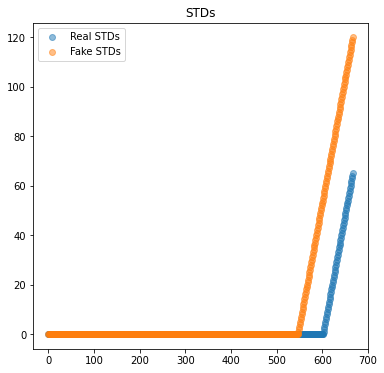

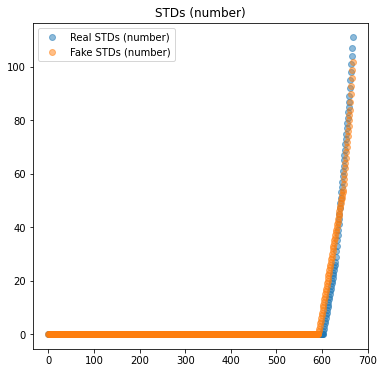

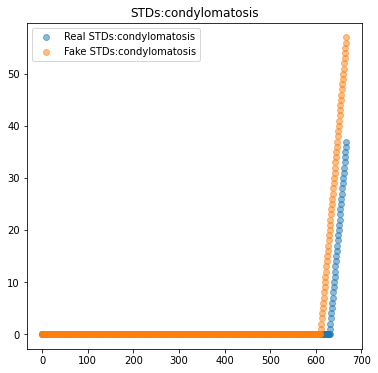

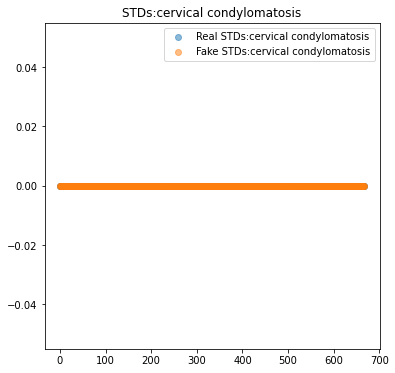

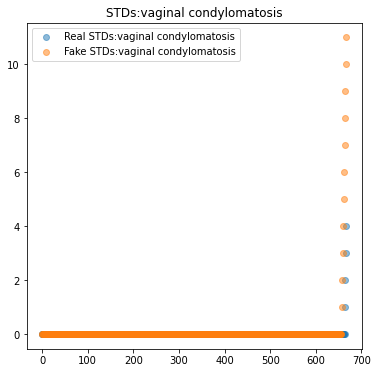

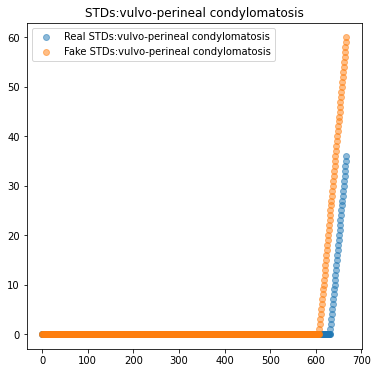

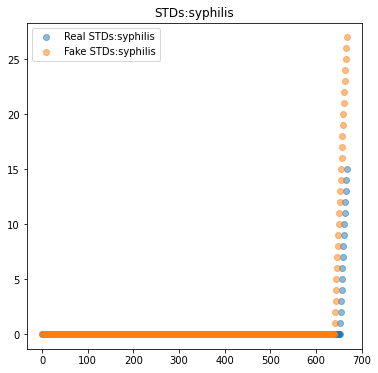

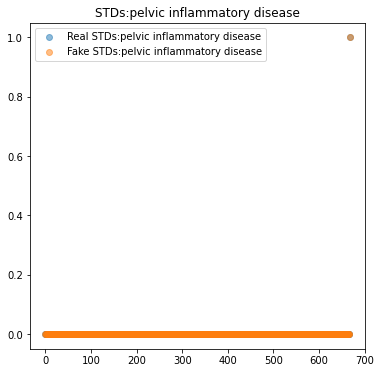

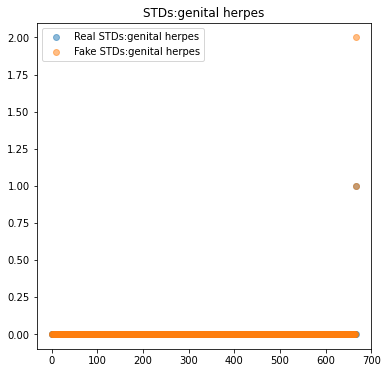

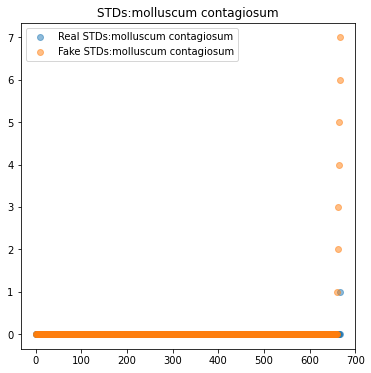

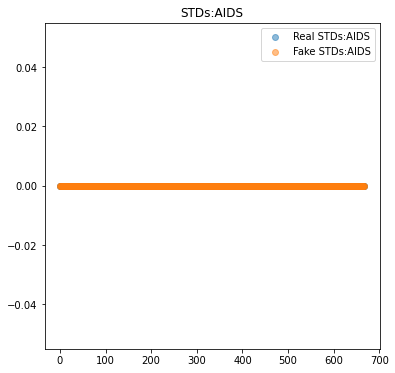

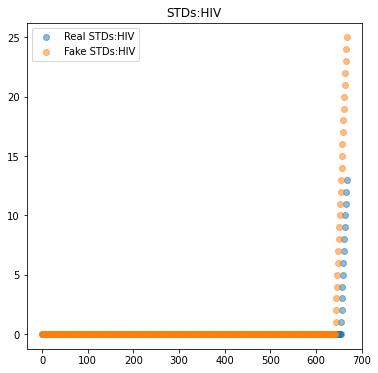

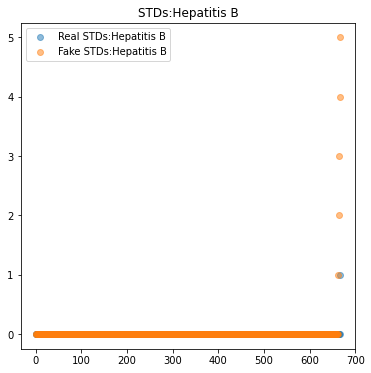

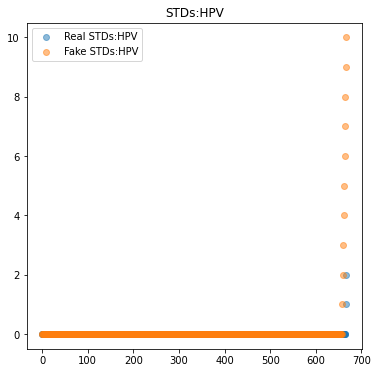

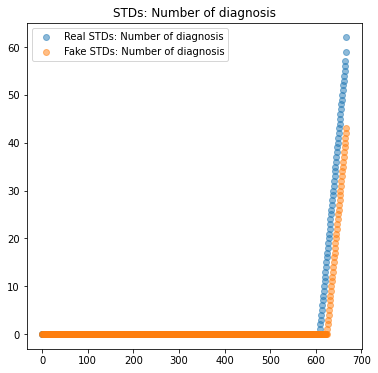

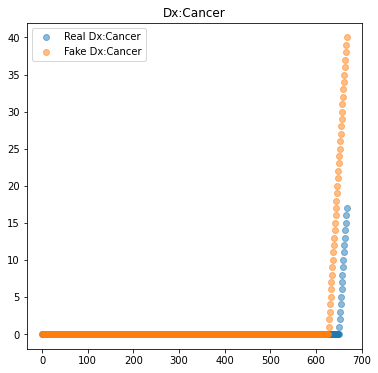

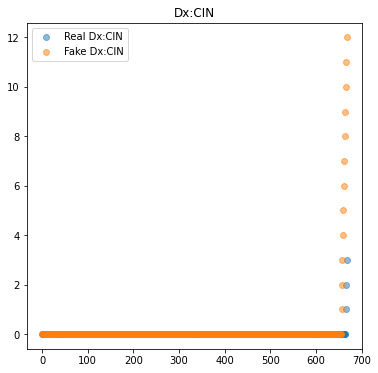

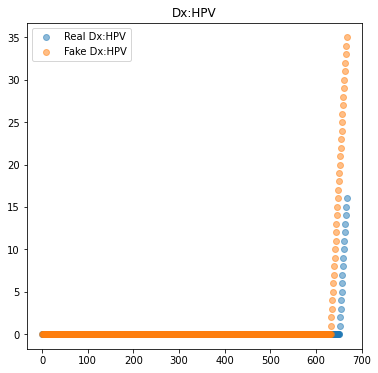

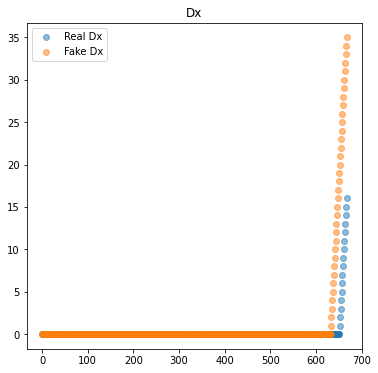

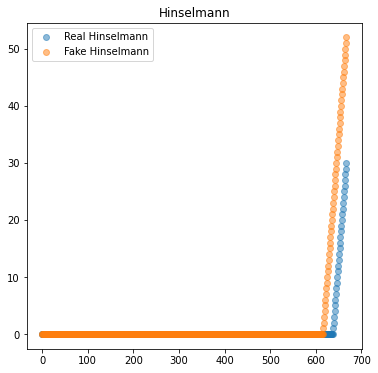

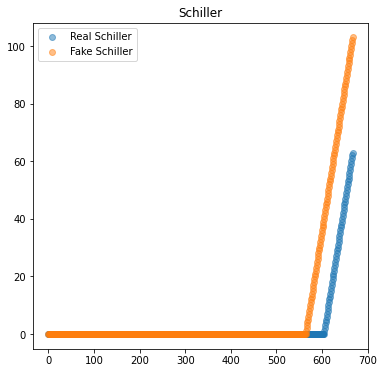

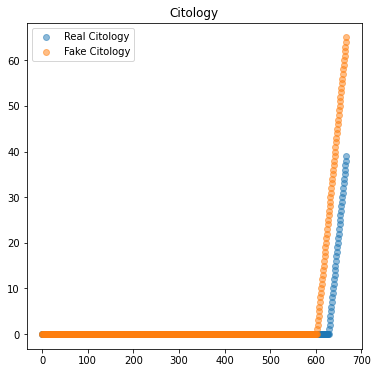

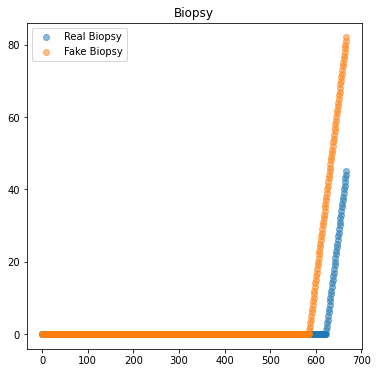

In [9]:
cumsum(real, ctgan_data)